# Project: Medical Appointment No Show Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Over 110 thousand of medical appointments took place in brazil, some patients did not show up for their appointments. the dataset contains 14 features including the present of the patient or not on his appointment date. The features can be classified into 4 groups, patient information (id, gender, age), appointment information (appointment id, appointment date, scheduled date, no show, sms received), health information (hypertension, diabetes, alcoholism, handicap) and social information (Neighborhood, Scholarship). by investigating the dataset, I am trying to answer the following questions:

> - What is proportion of noshow and show up are in the data? 

> - Is there any difference in number of No shows in different gender? 

> - In which month noshow on appointment day was highest?

> - Which age group has most number of noshows? 

> - Among the old_Adults category, for which disease there no show and show up are highest? 

> - Are the appointment booked many days before has more no shows?


#### Data Dictionary

- PatientId: Identification of a patient
- AppointmentID: Identification of each appointment
- Gender: Male or Female
- DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor.
- DataAgendamento: The day someone called or registered the appointment, this is before appointment of course.
- Age: How old is the patient.
- Neighbourhood: Where the appointment takes place.
- Scholarship: True of False . 
- Hipertension: True or False
- Diabetes: True or False
- Alcoholism: True or False
- Handcap: True or False
- MS_received: 1 or more messages sent to the patient.
- No-show: True or False.


Our dependednt variable is No-show here. 

In [1]:
# librarues used
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling & Data Cleaning

In [2]:
# load the data
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#no. of rows and column
df.shape

(110527, 14)

In [4]:
#stats of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see Age has a negative minimum value which is need to be cleaned. 

In [5]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Cleaning the column names
df.rename(columns=lambda x: x.strip().lower().replace("-","_"),inplace=True)


Column name are cleaned. 

#### With research, I found that 'No' in the dependent variable no_show represent people who show up for their appointmenht and 'Yes' represent vice versa. ####

In [7]:
# 0 represent no show and 1 represent show up for appointments 
df.no_show = df.no_show.map({'No': 1, 'Yes': 0})
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [8]:
# we can see min age is -1, which is wrong and we will change it to mean of the age column
df.query('age<0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,1


In [9]:
# there is only one value so we can replace it. 
df.age = df.age.replace(-1,np.mean(df.age))

In [10]:
df.age.describe()

count    110527.000000
mean         37.089219
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

Age column is now cleaned. 

In [11]:
#missing data
df.isna().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no_show           0
dtype: int64

In [12]:
#check duplicate values
df.duplicated().sum()

0

In [13]:
# change schedule day and appointment data to date time
df.scheduledday = df.scheduledday.apply(pd.to_datetime)
df.appointmentday = df.appointmentday.apply(pd.to_datetime)

In [14]:
#creating new column of month, day and year from Scheduled day 
df['s_year'] = pd.DatetimeIndex(df.scheduledday).year
df['s_month'] = pd.DatetimeIndex(df.scheduledday).month
df['s_day'] = pd.DatetimeIndex(df.scheduledday).day

#creating new column of month, day and year from Appointment day
df['a_year'] = pd.DatetimeIndex(df.appointmentday).year
df['a_month'] = pd.DatetimeIndex(df.appointmentday).month
df['a_day'] = pd.DatetimeIndex(df.appointmentday).day

In [15]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,s_year,s_month,s_day,a_year,a_month,a_day
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1,2016,4,29,2016,4,29
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1,2016,4,29,2016,4,29
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,1,2016,4,29,2016,4,29
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016,4,29,2016,4,29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1,2016,4,29,2016,4,29


In [16]:
#Finally check every data type is right.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 20 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns, UTC]
appointmentday    110527 non-null datetime64[ns, UTC]
age               110527 non-null float64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null int64
s_year            110527 non-null int64
s_month           110527 non-null int64
s_day             110527 non-null int64
a_year            110527 non-null int64
a_month           110527 non-null int64
a_day             110527 non-null int64
dtypes: datetime64[ns, UTC](2), float64(2), int64(14), 

In [17]:
#number of no shows in the data. 
df.no_show.value_counts()

1    88208
0    22319
Name: no_show, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### What is proportion of noshow and show up are in the data?

In [18]:
# proportion of people who showed up
np.mean(df.no_show)

0.798067440534892

In [19]:
# proportion of people who did not showed up

1 - np.mean(df.no_show)

0.20193255946510802

Text(0.5, 1.0, 'Number of patient showed up for appointment')

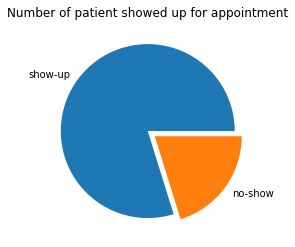

In [20]:
#Pie-Plot the proportion if no shows vs shows.
h = list(df.no_show.value_counts())
plt.pie(h,labels=['show-up','no-show'],explode=[0,0.1]);
plt.title("Number of patient showed up for appointment")
#plt.xlabel("No_show")
#plt.ylabel("Number of patient");

We can see 20% of the patient did not show up for their appointments. 

### Is there any difference in number of No shows in different gender ? 

In [21]:
#number of male and female in data

df.groupby('gender')['no_show'].value_counts()

gender  no_show
F       1          57246
        0          14594
M       1          30962
        0           7725
Name: no_show, dtype: int64

In [22]:
#proportion of genger who no_show
prop_f = len(df.query("gender == 'F' & no_show == 0")) / len(df.query("gender == 'F'"))
prop_m = len(df.query("gender == 'M' & no_show == 0")) / len(df.query("gender == 'M'"))
prop_m,prop_f

(0.19967947889471915, 0.20314587973273943)

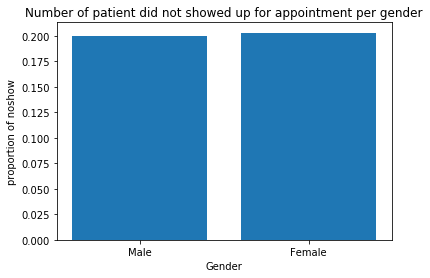

In [23]:
h = [prop_m,prop_f]
l = [0,1]
plt.bar(l,h,tick_label=['Male', 'Female']);
plt.title("Number of patient did not showed up for appointment per gender")
plt.xlabel("Gender")
plt.ylabel("proportion of noshow");

We can see there are more appoint data for the females but there is not much specfic difference in the avegare no shows by female and male. 

###  In which month noshow on appointment day was highest?

In [24]:
#Number of unique months
df.a_month.unique()

array([4, 5, 6], dtype=int64)

In [25]:
#number of records for each month
df.a_month.value_counts()

5    80841
6    26451
4     3235
Name: a_month, dtype: int64

In [26]:
#proportion of no shows for each month
prop_4 = len(df.query('no_show == 0 & a_month == 4')) / len(df.query('a_month == 4'))
prop_5 = len(df.query('no_show == 0 & a_month == 5')) / len(df.query('a_month == 5'))
prop_6 = len(df.query('no_show == 0 & a_month == 6')) / len(df.query('a_month == 6'))

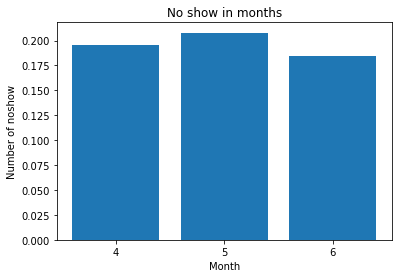

In [27]:
#plot
loc = [0,1,2]
plt.bar(loc, [prop_4,prop_5,prop_6],tick_label=[4,5,6])
plt.title("No show in months")
plt.xlabel('Month')
plt.ylabel('Number of noshow');

We can observe that in month of May, highest no shows were recorded. We can investigate the situation of May, 2016 in Brazil to find out was there some corelation with the situation at that point of time. 

### Which age group has most number of noshows ? 

In [28]:
#stats of age
df.age.describe()

count    110527.000000
mean         37.089219
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [29]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [ 0,18,37,55,115]

In [30]:
# Labels for the four age level groups
bin_names = ['Teen','Young_adult' ,'old_Adults','Old' ]

In [31]:
# Creates age_levels column
df["age_level"] = pd.cut(df["age"],bin_edges,labels=bin_names)

# Checks for successful creation of this column
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,...,handcap,sms_received,no_show,s_year,s_month,s_day,a_year,a_month,a_day,age_level
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,...,0,0,1,2016,4,29,2016,4,29,Old
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,...,0,0,1,2016,4,29,2016,4,29,Old
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,...,0,0,1,2016,4,29,2016,4,29,Old
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,...,0,0,1,2016,4,29,2016,4,29,Teen
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,...,0,0,1,2016,4,29,2016,4,29,Old


In [32]:
#number of noshows as per age_level
df.groupby('age_level')['no_show'].mean()

age_level
Teen           0.774628
Young_adult    0.764624
old_Adults     0.804698
Old            0.843550
Name: no_show, dtype: float64

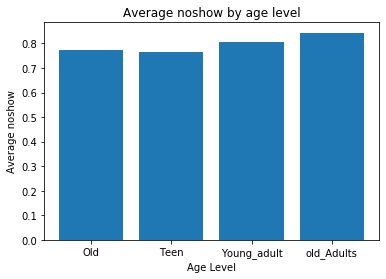

In [33]:
#plot of proportion of no shows as per age_level
mean_age_level = df.groupby('age_level')['no_show'].mean()

loca = [1,2,3,4]
labe = list(df.age_level.unique())
labe = labe[:-1]
labe
plt.bar(loca,mean_age_level,tick_label = labe)
plt.title("Average noshow by age level")
plt.xlabel('Age Level')
plt.ylabel('Average noshow');

Here we found out that age group between 37 and 55 has most number of no shows than any other groups. 

### Among the old_Adults category, for which disease there no show and show up are highest? 

In [34]:
#number of no shows as per age_groups
df.groupby('age_level')['no_show'].value_counts()

age_level    no_show
Teen         1          19619
             0           5708
Young_adult  1          20836
             0           6414
old_Adults   1          21652
             0           5255
Old          1          23201
             0           4303
Name: no_show, dtype: int64

In [35]:
#filtering out data for old_adults age group and finding the count of the disease as per no shows. 
df_new = df.query("age_level == 'old_Adults'")
counts = df_new.groupby('no_show')['hipertension','diabetes', 'alcoholism', 'handcap'].sum()

C:\Users\Shivam\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


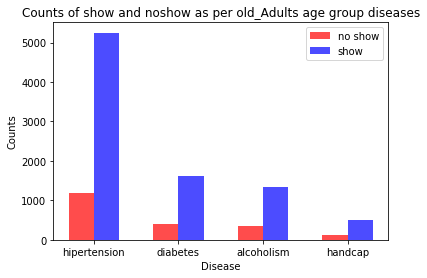

In [36]:
#plot the counts of no shows and show ups for appointment for diseases of old_adults age group. 
no_show_counts = list(counts.iloc[0,:])
show_counts = list(counts.iloc[1,:])
w = 0.3
ind = np.arange(len(show_counts))

no_bar = plt.bar(ind,no_show_counts,color='r',label= 'no show',width=w,alpha = 0.7)
show_bar = plt.bar(ind+w,show_counts,color='b',width = w,label = 'show',alpha = 0.7)
plt.title("Counts of show and noshow as per old_Adults age group diseases")
plt.xlabel("Disease")
plt.ylabel("Counts")
placing = ind+w / 2
plt.xticks(placing,['hipertension','diabetes', 'alcoholism', 'handcap']);
plt.legend()
ax = plt.axes();
#ax.set_facecolor('grey')




We can see the most number of diseases age group of 36 to 55 is recorded for hipertension. Most appointment were booked for hipertension and it also has most number of no shows as well. 

#### Are the appointment booked many days before has more no shows? 

In [37]:
df['diff'] = (df.scheduledday - df.appointmentday).dt.days
df['diff'].describe()

count    110527.000000
mean        -10.183702
std          15.254996
min        -179.000000
25%         -15.000000
50%          -4.000000
75%           0.000000
max           6.000000
Name: diff, dtype: float64

In [38]:
# Bin edges that will be used to "cut" the data into groups
bin_edges_2 = [ -179,-15,-4,0,6]

In [39]:
# Labels for the four level groups as per when the appointment was booked
bin_names_2 = ['very_early','early' ,'on-time','after' ]

In [40]:
# Creates age_levels column
df["book"] = pd.cut(df["diff"],bin_edges_2,labels=bin_names_2)

# Checks for successful creation of this column
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,...,no_show,s_year,s_month,s_day,a_year,a_month,a_day,age_level,diff,book
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,...,1,2016,4,29,2016,4,29,Old,0,on-time
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,...,1,2016,4,29,2016,4,29,Old,0,on-time


In [41]:
#number of noshows as per booking
df.groupby('book')['no_show'].mean()

book
very_early    0.672519
early         0.726528
on-time       0.903246
after         0.000000
Name: no_show, dtype: float64

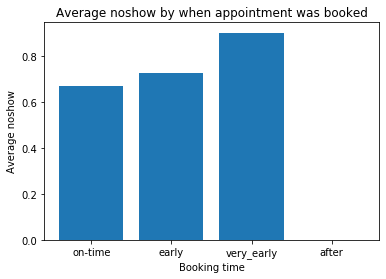

In [42]:
#plot of proportion of no shows as per booking date
mean_age_level = df.groupby('book')['no_show'].mean()

loca = [1,2,3,4]
labe = list(df.book.unique())
labe = labe[:-1]
labe
plt.bar(loca,mean_age_level,tick_label = labe)
plt.title("Average noshow by when appointment was booked")
plt.xlabel('Booking time')
plt.ylabel('Average noshow');

We can see the appointment which are booked more than 2 weeks before, have most number of no-shows. 

<a id='conclusions'></a>
## Conclusions

After exploring the data we found out that 20% of the records are no show data. There is not much significant difference in average no shows by female and male. We saw most no shows were observed in month of May. Age group of 37 to 55 has most number of no shows in the data. For this age group, highest appointments were booked for hipertension where we saw most number of no-shows.  Finally we also see that the appointments which are booked very early(more than 2 weeks before), have most number of no-shows. 

#### Reference:

> Udacity. (2020). Classroom.udacity.com. Retrieved 16 May 2020, from https://classroom.udacity.com/nanodegrees/nd002/parts/6f1ba175-1429-48e9-ab26-44d08ab21e7e/modules/0a58e8ea-c644-4024-861e-1a06ec4009c1/lessons/6b41e57c-9270-413b-b713-c6b2ec207b04/concepts/2295132b-bce5-4cec-b373-39e543517ea2